# Benchmark

## Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

## Data

In [2]:
token = "CRISPRi_simulation"

In [3]:
essentials = ["gene_" + str(i) for i in range(1, 61)]
print(essentials[:5])

non_essentials = ["gene_" + str(i) for i in range(61, 1761)]
print(non_essentials[:5])

['gene_1', 'gene_2', 'gene_3', 'gene_4', 'gene_5']
['gene_61', 'gene_62', 'gene_63', 'gene_64', 'gene_65']


### In-house

In [4]:
ih_file = "../../../results/%s/in_house_method/F_vs_T0/F_vs_T0_all-elements_in-house.txt" % token
ih_table = pd.read_table(ih_file, sep = "\t")
ih_table['Essential'] = np.where(ih_table.Gene.isin(essentials), True, False)
display(ih_table)

,Gene,up,down,n,scores,category,score,Essential
0,gene_55,0,2,16,0,down,-19.754292,True
1,gene_739,0,2,16,0,down,-12.727818,False
2,gene_1707,0,2,19,0,down,-12.250517,False
3,gene_33,0,10,12,0,down,-10.425416,True
4,gene_49,0,7,15,0,down,-10.383023,True
...,...,...,...,...,...,...,...,...
1755,gene_1561,2,0,16,0,up,8.029433,False
1756,gene_922,3,0,17,0,up,8.047591,False
1757,gene_644,2,0,17,0,up,8.493985,False
1758,gene_649,2,0,18,0,up,8.568619,False


In [5]:
def ih_results(table):
    def get_values(table, fdr_cutoff):
        tp = table.loc[table["score"] < fdr_cutoff].Gene.isin(essentials).sum()
        fn = table.loc[table["score"] >= fdr_cutoff].Gene.isin(essentials).sum()
        sensitivity = tp/(tp+fn)
        fp = table.loc[table["score"] < fdr_cutoff].Gene.isin(non_essentials).sum()
        tn = table.loc[table["score"] >= fdr_cutoff].Gene.isin(non_essentials).sum()
        false_positive_rate = fp/(fp+tn)
        return np.array([sensitivity, false_positive_rate])

    list_of_values = []
    for i in range(0, 501, 1):
        fdr_cutoff = -i
        list_of_values.append(get_values(table, abs(fdr_cutoff)))
    array_of_values = np.array(list_of_values)
    roc_values = pd.DataFrame(array_of_values, columns = ["sensitivity", "1-specificity"])
    roc_values['tool'] = "In-House"
    return roc_values
    
    
h = ih_results(ih_table)

### GSEA

In [6]:
gsea_file = "../../../results/%s/GSEA-like/F_vs_T0/F_vs_T0_all-elements_GSEA-like.txt" % token
gsea_table = pd.read_table(gsea_file, sep = "\t")
gsea_table['Essential'] = np.where(gsea_table.pathway.isin(essentials), True, False)
display(gsea_table)

,pathway,pval,padj,log2err,ES,NES,size,Essential
0,gene_1,0.737154,0.999178,0.059222,0.321884,0.775004,15,True
1,gene_10,0.399185,0.989482,0.092553,-0.421504,-1.029071,17,True
2,gene_100,0.952772,0.999178,0.049094,-0.228452,-0.566158,18,False
3,gene_1000,0.130612,0.965872,0.175204,-0.575324,-1.382610,16,False
4,gene_1001,0.890411,0.999178,0.049991,0.257883,0.632486,17,False
...,...,...,...,...,...,...,...,...
1755,gene_995,0.540323,0.999178,0.075502,-0.389027,-0.920037,15,False
1756,gene_996,0.347023,0.989482,0.101351,-0.432387,-1.071557,18,False
1757,gene_997,0.457143,0.989482,0.085043,-0.406815,-0.977651,16,False
1758,gene_998,0.797959,0.999178,0.057006,-0.303783,-0.730047,16,False


In [7]:
def gsea_results(table):
    def get_values(table, fdr_cutoff):
        tp = table.loc[table["padj"] < fdr_cutoff].pathway.isin(essentials).sum()
        fn = table.loc[table["padj"] >= fdr_cutoff].pathway.isin(essentials).sum()
        sensitivity = tp/(tp+fn)
        fp = table.loc[table["padj"] < fdr_cutoff].pathway.isin(non_essentials).sum()
        tn = table.loc[table["padj"] >= fdr_cutoff].pathway.isin(non_essentials).sum()
        false_positive_rate = fp/(fp+tn)
        return np.array([sensitivity, false_positive_rate])

    list_of_values = []
    for i in range(0, 101, 1):
        fdr_cutoff = i/100
        list_of_values.append(get_values(table, fdr_cutoff))
    array_of_values = np.array(list_of_values)
    roc_values = pd.DataFrame(array_of_values, columns = ["sensitivity", "1-specificity"])
    roc_values['tool'] = "GSEA-like"
    return roc_values

    
    
g = gsea_results(gsea_table)

### MLE

In [8]:
mle_file = "../../../results/%s/MAGeCK_MLE/F_vs_T0/F_vs_T0.gene_summary.txt" % token
mle_table = pd.read_table(mle_file, sep = "\t")
mle_table['Essential'] = np.where(mle_table.Gene.isin(essentials), True, False)
display(mle_table)

,Gene,sgRNA,T0|beta,T0|z,T0|p-value,T0|fdr,T0|wald-p-value,T0|wald-fdr,F|beta,F|z,F|p-value,F|fdr,F|wald-p-value,F|wald-fdr,Essential
0,gene_1,15,0,NaN,0,0,NaN,NaN,-0.116570,-0.512170,0.703980,0.98279,0.60853,0.884660,True
1,gene_2,17,0,NaN,0,0,NaN,NaN,-0.003981,-0.021403,0.966480,0.99068,0.98292,0.994350,True
2,gene_3,9,0,NaN,0,0,NaN,NaN,-0.994470,-3.393600,0.005114,0.42857,0.00069,0.052789,True
3,gene_4,15,0,NaN,0,0,NaN,NaN,0.451010,1.846700,0.096591,0.98279,0.06479,0.593910,True
4,gene_5,14,0,NaN,0,0,NaN,NaN,-0.088561,-0.481250,0.799430,0.99022,0.63034,0.891670,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1755,gene_1756,17,0,NaN,0,0,NaN,NaN,-0.081552,-0.533170,0.784660,0.98721,0.59392,0.882140,False
1756,gene_1757,16,0,NaN,0,0,NaN,NaN,-0.057112,-0.347830,0.859660,0.99062,0.72797,0.919490,False
1757,gene_1758,13,0,NaN,0,0,NaN,NaN,-0.099459,-0.441600,0.756250,0.98609,0.65878,0.895430,False
1758,gene_1759,17,0,NaN,0,0,NaN,NaN,-0.146190,-0.830970,0.587500,0.98279,0.40599,0.819700,False


In [9]:
def mle_results(table):
    def get_values(table, fdr_cutoff):
        tp = table.loc[table["F|fdr"] < fdr_cutoff].Gene.isin(essentials).sum()
        fn = table.loc[table["F|fdr"] >= fdr_cutoff].Gene.isin(essentials).sum()
        sensitivity = tp/(tp+fn)
        fp = table.loc[table["F|fdr"] < fdr_cutoff].Gene.isin(non_essentials).sum()
        tn = table.loc[table["F|fdr"] >= fdr_cutoff].Gene.isin(non_essentials).sum()
        false_positive_rate = fp/(fp+tn)
        return np.array([sensitivity, false_positive_rate])

    list_of_values = []
    for i in range(0, 101, 1):
        fdr_cutoff = i/100
        list_of_values.append(get_values(table, fdr_cutoff))
    array_of_values = np.array(list_of_values)
    roc_values = pd.DataFrame(array_of_values, columns = ["sensitivity", "1-specificity"])
    roc_values['tool'] = "MAGeCK-MLE"
    return roc_values

    
    
m = mle_results(mle_table)

### MAGeCK RRA

In [10]:
rra_file = "../../../results/%s/MAGeCK_RRA/F_vs_T0/F_vs_T0.gene_summary.txt" % token
rra_table = pd.read_table(rra_file, sep = "\t")
rra_table['Essential'] = np.where(rra_table.id.isin(essentials), True, False)
display(rra_table)

,id,num,neg|score,neg|p-value,neg|fdr,neg|rank,neg|goodsgrna,neg|lfc,pos|score,pos|p-value,pos|fdr,pos|rank,pos|goodsgrna,pos|lfc,Essential
0,gene_33,12,2.131800e-15,0.000003,0.000550,1,12,-4.60450,1.000000,1.000000,0.999997,1760,0,-4.60450,True
1,gene_23,16,2.729500e-12,0.000003,0.000550,2,13,-3.38300,0.857980,0.957390,0.999997,1675,1,-3.38300,True
2,gene_49,15,1.276000e-11,0.000003,0.000550,3,15,-2.68950,1.000000,1.000000,0.999997,1759,0,-2.68950,True
3,gene_52,16,2.561800e-11,0.000003,0.000550,4,14,-3.45620,0.999820,0.999800,0.999997,1756,0,-3.45620,True
4,gene_59,13,1.700000e-10,0.000003,0.000550,5,12,-2.81210,0.999990,0.999990,0.999997,1758,0,-2.81210,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1755,gene_946,13,9.956000e-01,0.995740,0.999715,1756,1,0.47740,0.300920,0.590080,0.997403,1091,5,0.47740,False
1756,gene_1595,12,9.985400e-01,0.998560,0.999800,1757,0,1.12080,0.015171,0.071037,0.976888,116,7,1.12080,False
1757,gene_781,15,9.985700e-01,0.998660,0.999800,1758,0,1.03480,0.002133,0.014084,0.976888,20,10,1.03480,False
1758,gene_408,17,9.996700e-01,0.999640,0.999975,1759,0,0.91111,0.013647,0.073062,0.976888,104,10,0.91111,False


In [11]:
def rra_results(table):
    def get_values(table, fdr_cutoff):
        tp = table.loc[table["neg|fdr"] < fdr_cutoff].id.isin(essentials).sum()
        fn = table.loc[table["neg|fdr"] >= fdr_cutoff].id.isin(essentials).sum()
        sensitivity = tp/(tp+fn)
        fp = table.loc[table["neg|fdr"] < fdr_cutoff].id.isin(non_essentials).sum()
        tn = table.loc[table["neg|fdr"] >= fdr_cutoff].id.isin(non_essentials).sum()
        false_positive_rate = fp/(fp+tn)
        return np.array([sensitivity, false_positive_rate])

    list_of_values = []
    for i in range(0, 101, 1):
        fdr_cutoff = i/100
        list_of_values.append(get_values(table, fdr_cutoff))
    array_of_values = np.array(list_of_values)
    roc_values = pd.DataFrame(array_of_values, columns = ["sensitivity", "1-specificity"])
    roc_values['tool'] = "MAGeCK-RRA"
    return roc_values


r = rra_results(rra_table)

### CRISPhieRmix

In [12]:
crisphiermix_file = "../../../results/%s/CRISPhieRmix/F_vs_T0/F_vs_T0.txt" % token
crisphiermix_table = pd.read_table(crisphiermix_file, sep = ",")
crisphiermix_table['Essential'] = np.where(crisphiermix_table.gene.isin(essentials), True, False)
display(crisphiermix_table)

,gene,locfdr,score,FDR,top_3_mean_log2FoldChange,Essential
0,gene_1,0.405527,0.594473,0.184893,-0.549224,True
1,gene_10,0.792193,0.207807,0.491627,-0.954829,True
2,gene_100,0.894733,0.105267,0.575437,-0.775126,False
3,gene_1000,0.026052,0.973948,0.007944,-0.456762,False
4,gene_1001,0.860833,0.139167,0.554669,0.711852,False
...,...,...,...,...,...,...
1755,gene_995,0.425828,0.574172,0.196225,0.437414,False
1756,gene_996,0.666064,0.333936,0.383814,-0.555135,False
1757,gene_997,0.583536,0.416464,0.305126,-2.998778,False
1758,gene_998,0.220286,0.779714,0.090491,1.410172,False


In [13]:
def crisphiermix_results(table):
    def get_values(table, fdr_cutoff):
        tp = table.loc[table.FDR < fdr_cutoff].gene.isin(essentials).sum()
        fn = table.loc[table.FDR >= fdr_cutoff].gene.isin(essentials).sum()
        sensitivity = tp/(tp+fn)
        fp = table.loc[table.FDR < fdr_cutoff].gene.isin(non_essentials).sum()
        tn = table.loc[table.FDR >= fdr_cutoff].gene.isin(non_essentials).sum()
        false_positive_rate = fp/(fp+tn)
        return np.array([sensitivity, false_positive_rate])

    list_of_values = []
    for i in range(0, 101, 1):
        fdr_cutoff = i/100
        list_of_values.append(get_values(table, fdr_cutoff))
    array_of_values = np.array(list_of_values)
    roc_values = pd.DataFrame(array_of_values, columns = ["sensitivity", "1-specificity"])
    roc_values['tool'] = "CRISPhieRmix"
    return roc_values

    
    
c = crisphiermix_results(crisphiermix_table)

In [14]:
pdList = [h, m, r, c, g]
all_tools = pd.concat(pdList).reset_index()
all_tools

,index,sensitivity,1-specificity,tool
0,0,0.316667,0.042941,In-House
1,1,0.983333,0.945294,In-House
2,2,0.983333,0.950000,In-House
3,3,0.983333,0.960588,In-House
4,4,0.983333,0.980588,In-House
...,...,...,...,...
900,96,0.333333,0.123529,GSEA-like
901,97,0.333333,0.128235,GSEA-like
902,98,0.333333,0.131765,GSEA-like
903,99,0.716667,0.456471,GSEA-like


<AxesSubplot:xlabel='1-specificity', ylabel='sensitivity'>

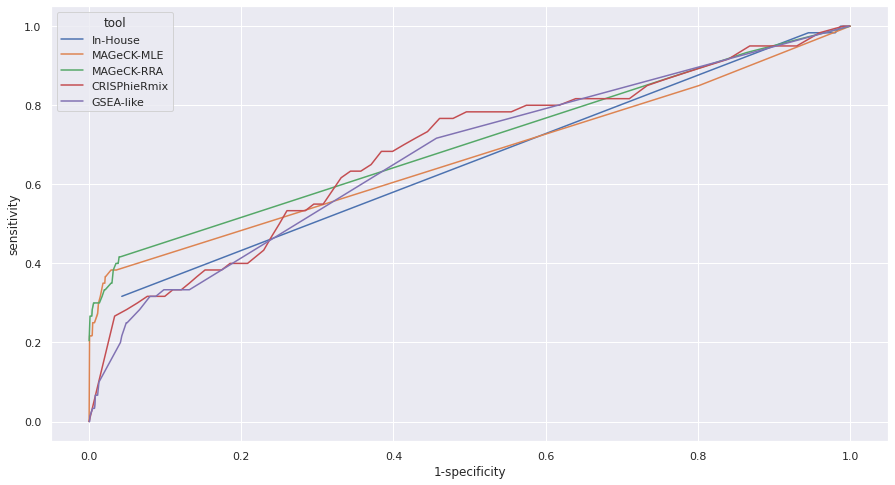

In [15]:
sns.set(rc = {'figure.figsize':(15,8)})

sns.lineplot(data=all_tools, x = "1-specificity", y = "sensitivity", hue="tool")